### **Due Date**
9/5/2024 at 11:59 PM EST

### **Introduction**

Welcome to Assignment 0 of 4756. In this short notebook, we hope to refresh your memory with common Numpy pain points and PyTorch. Please read through the following paragraphs carefully, as they will apply to this and all future assignments.

**Evaluation:**
Your code will be tested for correctness and, for certain assignments, speed. Please remember that all assignments should be completed individually.

**Academic Integrity:** We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else’s code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don’t try. We trust you all to submit your own work only; please don’t let us down. If you do, we will pursue the strongest consequences available to us.

**Getting Help:** The [Resources](https://www.cs.cornell.edu/courses/cs4756/2024fa/#resources) section on the course website is your friend (especially for this first assignment)! If you ever feel stuck in these projects, please feel free to avail yourself to office hours and Edstem! If you are unable to make any of the office hours listed, please let TAs know and we will be happy to assist. Of course, Numpy and Python skills will also be implicitly tested via this assignment. If you need a refresher, please see this [60 minute blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) for PyTorch! For Numpy, please see the quickstart [here](https://numpy.org/doc/stable/user/quickstart.html) and full API [here](https://numpy.org/doc/stable/reference/). 


To run this notebook, you can see [this guide](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) for VSCode. Create a new virtual environment and then activate it to install the requirements. If the virtual environment you created through VS Code is called `.venv`, you can run
```bash
source .venv/bin/activate
pip install -r requirements.txt
```

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Reload code in q1 and q2 modules without having to restart the kernel
%load_ext autoreload
%autoreload 2

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

### Q1: Shapes and Sizes

In this first question, we hope to get you familiar thinking about and working with shapes in both Numpy and PyTorch. The most common pain points we see in this class are related to debugging shape and sizing issues. To help you get familiar with this, we've provided some buggy code that needs to be debugged.

There are 3 functions to modify in this section, located in `q1.py`. Below, `calculate_distances` is called with some inputs and there are two assert statements that check for the correct shape and correct numbers. Please modify `calculate_distances` in `q1.py` to pass the asserts. You should not need to modify the inputs. The bugs are also simple enough to be fixed in-line - you should not need to add many lines of code.

To debug, we suggest printing out each intermediate step of your code to check that the shapes are what you expect them to be. If you are confused about the output of a print statement, check out the documentation or ask for help.

In [10]:
import q1

x = np.array([[0, 0], [1, 0], [2, 0]])
y = np.array([[3, 4], [3, 0], [-2, 0]])
n, d = x.shape

distance = q1.calculate_distances(x, y)
assert distance.shape == (n, 1), f"Wrong shape: {distance.shape} != {(n, 1)}"
assert np.array_equal(distance, np.array([[5], [2], [4]])), f"Wrong values: {distance}"

(3, 2)
(3, 2)
(3,)
(3, 1)
[[5.]
 [2.]
 [4.]]


Once you have fixed `calculate_distances` and the assert statements are passing, try fixing function `combine_squares` below. Now you are working with PyTorch tensors but they are very similar to Numpy arrays. Use the same debugging principles as before.

In [12]:
square_1 = torch.tensor([[0 , 1 ], [4 , 5 ]])
square_2 = torch.tensor([[2 , 3 ], [6 , 7 ]])
square_3 = torch.tensor([[8 , 9 ], [12, 13]])
square_4 = torch.tensor([[10, 11], [14, 15]])
n, _ = square_1.shape

combined_square = q1.combine_squares(square_1, square_2, square_3, square_4)
assert combined_square.shape == (2 * n, 2 * n), f"Wrong shape: {combined_square.shape} != {(2 * n, 2 * n)}"
assert torch.equal(combined_square, torch.tensor([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10 ,11], [12, 13, 14, 15]])), f"Wrong values: {combined_square}"

Now you will combine your knowledge from the previous two functions and implement `video_to_filmstrip`. We omit the assert statements here so you should write your own to verify the correctness of your code. For reference, the solution is 3 lines of code. Your code should be vectorized meaning do not use any for loops and only use Numpy/PyTorch functions.

In [29]:
video_frames = []
for i in range(10):
    video_frames.append(np.ones((1080, 1920, 3)) * i)

filmstrip = q1.video_to_filmstrip(video_frames)
#size/shape assert in this cell 
#confused about the assertion 
assert filmstrip.shape == (1080, 1920 * 10, 3), f"Wrong shape: {filmstrip.shape} != {(1080, 1920 * 10, 3)}"


### Q2: A Simple Regressor

This second question will hopefully refresh your memory of how to train a model in PyTorch and give you a general idea of what coding assignments will look like in this class. 

In this question, we are testing your ability to solve a simple regression problem. First we generate some train and test data. This should not be modified.

In [30]:
# Generate train/test data
data_size = 500
X = np.random.rand(data_size, 1)
Y = -4 * X + 2 + np.random.randn(data_size, 1)

test_split = int(data_size * 0.8)
x_train, x_test = X[:test_split], X[test_split:]
y_train, y_test = Y[:test_split], Y[test_split:]

x_train, y_train = torch.tensor(x_train).float(), torch.tensor(y_train).float()
x_test, y_test = torch.tensor(x_test).float(), torch.tensor(y_test).float()

Now your task is to implement a simple linear regressor. Refer to script `q2.py` and implement the TODOs. You will need to implement the `forward()` pass, specify a loss function and optimizer, and write a training loop that includes checkpointing logic to save the best model.

In [31]:
import q2
checkpoint_path = q2.get_checkpoint_path()
model = q2.LinearRegression()
loss_fn, optimizer = q2.create_loss_and_optimizer(model)
q2.train(x_train, y_train, model, loss_fn, optimizer, checkpoint_path, num_epochs=1000)

Finished Training


You should also implement `load_model_checkpoint` so you can load your best model to evaluate. This is useful for us to grade your assignment. For future assignments, you can also save information such as the optimizer state and epochs to resume training if your training is interrupted.

In [32]:
model = q2.load_model_checkpoint(checkpoint_path)

c:\Users\rheak\OneDrive\Documents\Data\Cornell\Junior\CS 4756\assignments\A0\q2.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = LinearRegression()


Below we provide code snippets to visualize the performance of your model on the training and test data. You do not need to modify this code - use this as a sanity check to make sure your training code is working. There is no expected threshold for this assignment since the only intention to get you familiar with PyTorch. The test plot will be saved to `q2_test.png` - this must be included in your submission. If this test plot looks reasonable, you will receive full points.

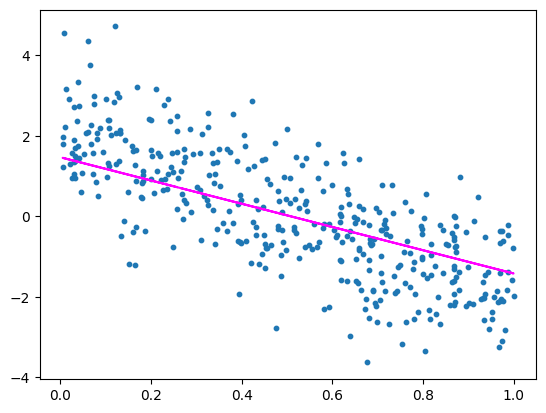

In [33]:
# Plot training performance 
plt.scatter(x_train, y_train, s=10)
with torch.no_grad():
  y_pred = model(x_train)
y_pred = y_pred.numpy()
plt.plot(x_train, y_pred, color='magenta')
plt.show()

In [34]:
# Test the model
with torch.no_grad():
  y_pred = model(x_test)
  test_loss = loss_fn(y_pred, y_test)
  print(f"Test loss: {test_loss.item()}")

Test loss: 1.0096930265426636


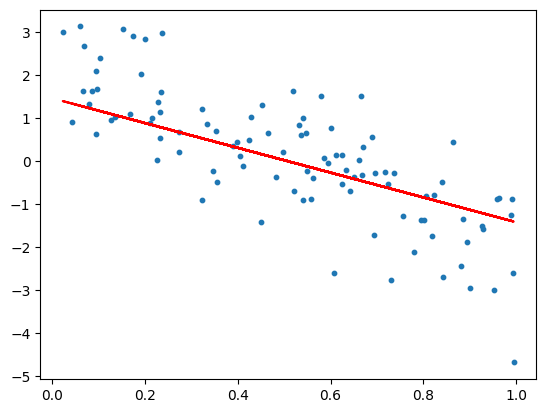

In [35]:
# Plot test performance 
plt.scatter(x_test, y_test, s=10)
with torch.no_grad():
  y_pred = model(x_test)
y_pred = y_pred.numpy()
plt.plot(x_test, y_pred, color='red')
plt.savefig('q2_test.png')
plt.show()